<a href="https://colab.research.google.com/github/Amiya-Kalita/Machine-Learning/blob/main/Gradient_boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Setup and Load the Data

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loding

In [7]:
df = pd.read_csv("/content/drive/MyDrive/DataSets/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.shape

(768, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [37]:
df.duplicated().value_counts()

,count
False,768


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Step 2: Exploratory Data Analysis (EDA)

In [12]:
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in zero_cols:
    print(f"{col} : {(df[col] == 0).sum()}")

Glucose : 5
BloodPressure : 35
SkinThickness : 227
Insulin : 374
BMI : 11


In [13]:
print("\nTarget distribution:")
print(df['Outcome'].value_counts(normalize=True))


Target distribution:
Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


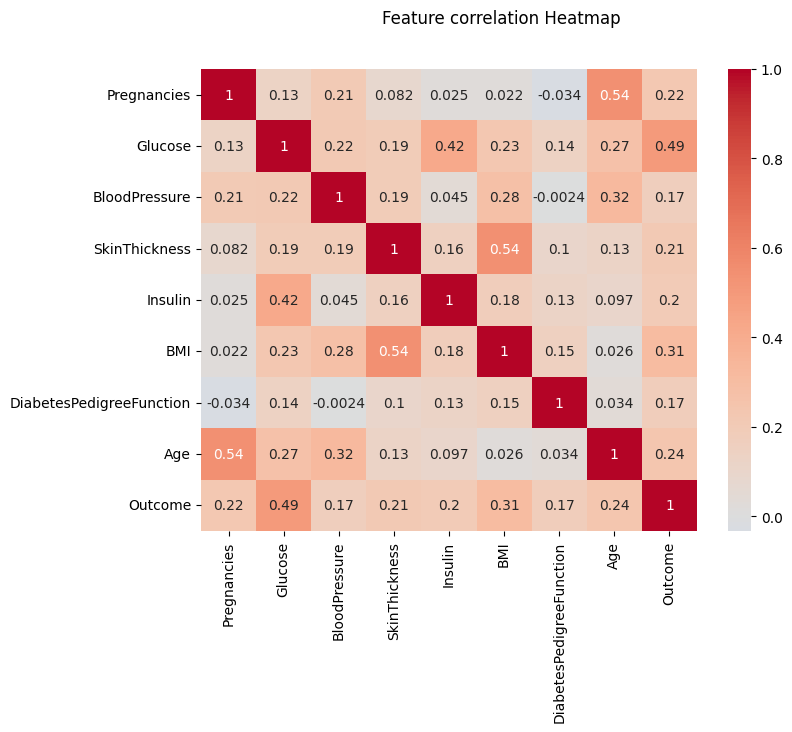

In [35]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True , cmap='coolwarm' , center=0)
plt.suptitle('Feature correlation Heatmap')
plt.show()

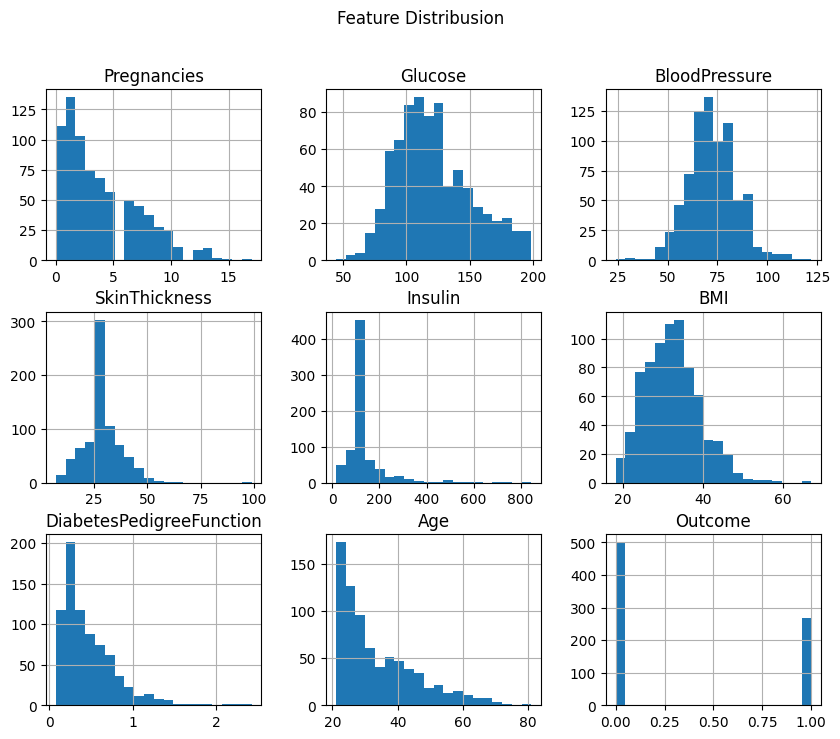

In [41]:
df.hist(bins=20 , figsize=(10,8))
plt.suptitle('Feature Distribusion')
plt.tight_layout
plt.show()

### Step 3: Data Preprocessing

In [18]:
for col in zero_cols:
    df[col] = df[col].replace(0, np.nan)
    df[col].fillna(df[col].median() , inplace=True)

x = df.drop('Outcome', axis=1)
y = df['Outcome']

/tmp/ipython-input-1756197029.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median() , inplace=True)


In [19]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled , columns=x.columns)

print("preprocessed X Shape", x_scaled.shape)
print("\nSample scaled data: ")
x_scaled.head()

preprocessed X Shape (768, 8)

Sample scaled data: 


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496


### Step 4: Train-Test Split

In [20]:
x_train , x_test , y_train , y_test = train_test_split(x_scaled , y , test_size=0.2 , random_state=42 , stratify=y)
print("Train shape:", x_train.shape , "Test shape:" , x_test.shape)
print("Train target distribusion:" , y_train.value_counts(normalize = True))

Train shape: (614, 8) Test shape: (154, 8)
Train target distribusion: Outcome
0    0.651466
1    0.348534
Name: proportion, dtype: float64


### Step 5: Baseline Model (Logistic Regression)

In [21]:
baseline = LogisticRegression(random_state=42)
baseline.fit(x_train , y_train)
y_pred_baseline = baseline.predict(x_test)
baseline_acc = accuracy_score(y_test , y_pred_baseline)
print("Baseline Accuracy:", baseline_acc)
print("\nClassification Report: \n", classification_report(y_test , y_pred_baseline))

Baseline Accuracy: 0.7012987012987013

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.81      0.78       100
           1       0.59      0.50      0.54        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154



### Step 6: Train Gradient Boosting Model (Using scikit-learn)

In [22]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(x_train, y_train)
y_pred_gb = gb_model.predict(x_test)
gb_acc = accuracy_score(y_test, y_pred_gb)
print("GB Accuracy:", gb_acc)
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

GB Accuracy: 0.7597402597402597

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.82       100
           1       0.69      0.57      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.72       154
weighted avg       0.75      0.76      0.75       154


Confusion Matrix:
 [[86 14]
 [23 31]]


In [23]:
importances = gb_model.feature_importances_
feat_imp = pd.DataFrame({'Feature': x.columns, 'Importance': importances}).sort_values('Importance', ascending=False)
print("\nFeature Importances:\n", feat_imp)


Feature Importances:
                     Feature  Importance
1                   Glucose    0.413540
5                       BMI    0.193867
7                       Age    0.116880
6  DiabetesPedigreeFunction    0.108349
4                   Insulin    0.079698
0               Pregnancies    0.054101
3             SkinThickness    0.017792
2             BloodPressure    0.015773


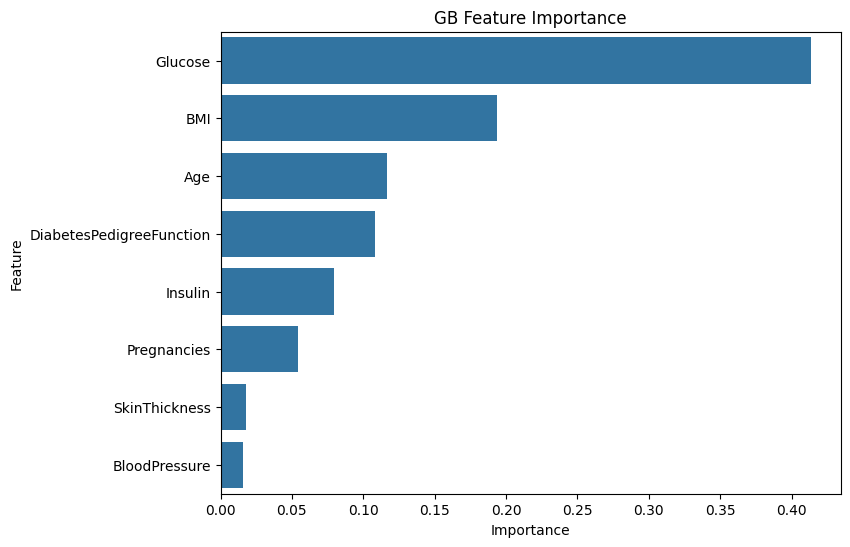

In [24]:
plt.figure(figsize=(8,6))
sns.barplot(data=feat_imp , x = "Importance" , y = "Feature")
plt.title("GB Feature Importance")
plt.show()

### Step 7: Teaching Gradient Boosting – From-Scratch Implementation

#### implement a simplified binary logistic Gradient Boosting from scratch. We'll use:

1. Loss: Binary log loss (BCE).

2. Gradients: Pseudo-residuals = y - p (for simplicity; actual is -gradient of loss).

3. Weak learners: Shallow DecisionTreeRegressor (depth=3).
100 trees, learning rate=0.1.

This mimics sklearn's internals but is educational (not optimized).

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import log_loss

In [27]:
class SimpleGB:
    def __init__(self , n_estimators = 100 , learning_rate = 0.1 , max_depth = 3 , random_state = 42):
          self.n_estimators = n_estimators
          self.learning_rate = learning_rate
          self.max_depth = max_depth
          self.random_state = random_state
          self.trees = []
          self.initial_pred  = None

    def fit(self , x , y):
        np.random.seed(self.random_state)
        self.initial_pred = np.log((y.mean() / (1 - y.mean()))) / 2
        pred = np.full(len(y) , self.initial_pred)

        for _ in range(self.n_estimators):
            p = 1 / (1+np.exp(-pred))
            residuals = y - p
            tree = DecisionTreeRegressor(max_depth= self.max_depth , random_state = self.random_state)
            tree.fit(x , residuals)
            self.trees.append(tree)
        return self

    def predict_proba(self , x):
        pred = np.full(len(x) , self.initial_pred)
        for tree in self.trees:
            pred += self.learning_rate * tree.predict(x)
        proba = 1 / (1 + np.exp(-pred))
        return np.column_stack([1 - proba , proba])

    def predict(self , x):
        proba = self.predict_proba(x)[: , 1]
        return (proba > 0.5).astype(int)

In [28]:
scratch_gb = SimpleGB(n_estimators=100, learning_rate=0.1, max_depth=3)
scratch_gb.fit(x_train, y_train)
y_pred_scratch = scratch_gb.predict(x_test)
scratch_acc = accuracy_score(y_test, y_pred_scratch)
print("From-Scratch GB Accuracy:", scratch_acc)
print("\nClassification Report:\n", classification_report(y_test, y_pred_scratch))

From-Scratch GB Accuracy: 0.6883116883116883

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.92      0.79       100
           1       0.64      0.26      0.37        54

    accuracy                           0.69       154
   macro avg       0.67      0.59      0.58       154
weighted avg       0.68      0.69      0.64       154



### Step 8: Evaluation & Hyperparameter Tuning

In [29]:
from sklearn.model_selection import GridSearchCV , cross_val_score

cv_scores = cross_val_score(gb_model , x_scaled , y , cv =5 , scoring = 'accuracy')
print("Cv accuracy Mean (std) :" , cv_scores.mean() , "(" , cv_scores.std(), ")")

Cv accuracy Mean (std) : 0.7643323996265172 ( 0.022218087952689123 )


In [30]:
param_grid = {
    'n_estimators' : [50, 100 , 200],
    'learning_rate' : [0.05 , 0.1],
    'max_depth' : [2, 3 , 4]
}

In [31]:
grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
print("Best Params:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

Best Params: {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 50}
Best CV Accuracy: 0.7704118352658936


In [32]:
tuned_gb = grid_search.best_estimator_
y_pred_tuned = tuned_gb.predict(x_test)
tuned_acc = accuracy_score(y_test , y_pred_tuned)
print("Tuned Test Accuracy :", tuned_acc)

Tuned Test Accuracy : 0.7077922077922078


### Step 9: Model Interpretation & Bias Check

In [33]:
from sklearn.metrics import roc_auc_score , roc_curve
y_proba_gb = gb_model.predict_proba(x_test)[: , 1]
auc = roc_auc_score(y_test , y_proba_gb)

print("GB auc", auc)

GB auc 0.8305555555555556


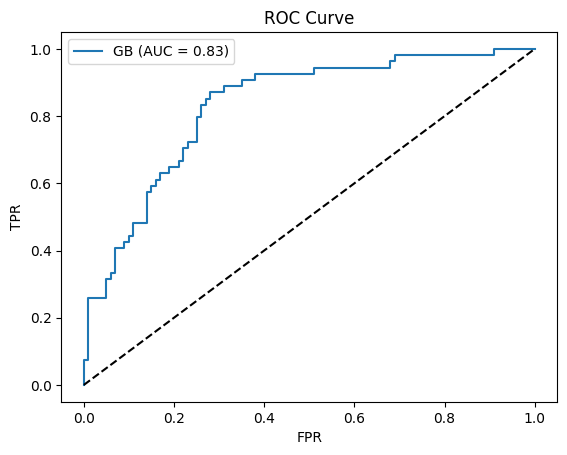

In [34]:
fpr , tpr , _ = roc_curve(y_test , y_proba_gb)
plt.plot(fpr , tpr , label = f"GB (AUC = {auc:.2f})")
plt.plot([0,1] , [0, 1] , 'k--')
plt.xlabel('FPR')
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()
plt.show()

### Step 9: Model Interpretation & Bias Check

In [39]:
import joblib
joblib.dump(gb_model, 'gb_diabetes.pkl')
print("Gradient Boosting Model saved Sucessfully")

Gradient Boosting Model saved Sucessfully
